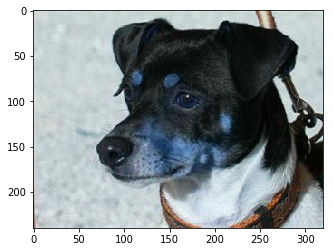

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

#https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

DATADIR = "../PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(img_array)
        plt.show()
        break
    break

    

In [6]:
print(img_array.shape)

(240, 320, 3)


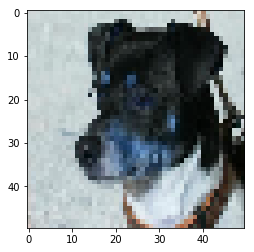

In [13]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [14]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    
create_training_data()

In [15]:
print(len(training_data))

24946


In [16]:
import random
random.shuffle(training_data)

In [19]:
#print(training_data[:10])
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
0
1
1
0
1
1


In [22]:
X = []
y = []

In [23]:
for feature, label in training_data:
    X.append(feature)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [24]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [25]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [27]:
print(X[1])

[[[199 208 218]
  [199 208 218]
  [199 208 218]
  ...
  [ 79  92 108]
  [ 76  95 120]
  [ 77  97 121]]

 [[198 207 217]
  [197 206 216]
  [197 206 216]
  ...
  [ 87 103 122]
  [ 84  98 120]
  [ 88 102 124]]

 [[197 206 216]
  [196 205 215]
  [194 203 213]
  ...
  [ 99 115 132]
  [ 94 111 130]
  [ 95 112 131]]

 ...

 [[ 96 131 175]
  [124 160 200]
  [126 162 202]
  ...
  [130 166 196]
  [145 179 209]
  [ 87 122 162]]

 [[120 155 197]
  [124 162 197]
  [131 167 207]
  ...
  [139 175 205]
  [143 177 207]
  [ 85 121 161]]

 [[124 160 200]
  [127 163 203]
  [112 151 190]
  ...
  [145 179 208]
  [109 141 176]
  [ 90 127 162]]]
